#### 1. NLP problems categories:
    sentiment analysis/context analysis
    topic modelling
    classification
    chatbot
    knowledge graph
    
#### 2. Most common challenges with text data
    case
    stop words
    verb forms/root words
    punctuations
    abbreviation
    numbers    
    
#### 3. packages available for relevant problems
    language model (nltk, spacy)
    lstm (deep learning)   

In [1]:
# 'This is a feedback.'
# 'this is a feedback'

# ### 
# stop words: is,the,a,an,are,etc.
# {'eat','eating','ate'},{'walk','walking','walks'} 
# punctuations: ,!@
# as soon as possible => ASAP
# Bank of America => BOA
# Unite states of America => USA
# End of the day => EOD 
# numbers => text, digit (ten, 10)
# NER =>


#### common issues with structure data
    data types
    missing values 
    object type columns
    correlated columns



#### 4. Problem type - classification 
##### Problem Statement
company X identifies ADRs (adverse drug reactions) after a drug’s release. Comprehensive knowledge of ADRs can reduce the detrimental impact on patient’s health system. Practically, clinical trials cannot investigate all settings in which a drug will be used, making it impossible to fully characterize the drug’s adverse effect profile before its approval. company X methods continuously analyse frequently updated data sources, Twitter in particularly because of its large user base, demographic variability, and publicly available data.
    ADR detection in social media requires automated methods to process the high data volume. It would greatly help if is able to automate the segmentation of Tweet into either ADR or NON-ADR, on the basis of Drug, Symptom and Effect mentioned in future.
    
 The dataset comprises of medicine feedback from tweeter.   (data_text.csv)

#### Cleaning data includes    
    tranform text data to lower case
    removing stop words
    Lammetization/stemming
    removing punctuations
    tokenisation
    NER indentification
    abbreviation correction
    removing numbers 

In [2]:
#### import necessaries packages
import string
import nltk
import re
import pandas as pd
stopword = nltk.corpus.stopwords.words('english')

In [3]:
### set display options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [4]:
#Read the dataset 
tweets_df = pd.read_csv('data_text.csv')
print(tweets_df.shape)

(23516, 3)


In [5]:
tweets_df.tweets

0            Intravenous azithromycin-induced ototoxicity.
1        Immobilization, while Paget's bone disease was...
2        Unaccountable severe hypercalcemia in a patien...
3        METHODS: We report two cases of pseudoporphyri...
4        METHODS: We report two cases of pseudoporphyri...
                               ...                        
23511    At autopsy, the liver was found to be small, s...
23512    Physical exam revealed a patient with aphasia,...
23513    At the time when the leukemia appeared seven o...
23514    The American Society for Regional Anesthesia a...
23515    Concomitant administration of estradiol result...
Name: tweets, Length: 23516, dtype: object

In [6]:
# # reaction, pain, report, severe, allergy, case, side effect, effect, bad, sad, fever, ichting, headach,
# lethargy, resulted, stress, 

##### Notes:
column 'tweets' has tweets of the users. These are feedback on the medicine. column 'label' represents if the
tweet indicates positive feedback or negative feedback on the medicine which has been launched in the recent past.
In order words, when label = 0 it means feedback is positive and there was no side-effect using the medicine.
when label = 1, there was some sort of side-effect released by using the medicine. 

In [7]:
### let's start with checking words frequency in the given dataset. 
### This will give an insight of words having highest weightage and also, 
### help use in unsderstading if we need to retain or remove them.
### word frequency can be seen easily in form of WordCloud.

In [8]:
#Adding all the words from various rows in a single list
## all tweets
list_ = []
for i in range(0,len(tweets_df)):
    list_.append(tweets_df['tweets'][i])
reviews = "".join(list_)

## all tweets where lable = 1
list_1 = []
for i in range(0,len(tweets_df[tweets_df.label == 1])):
    list_1.append(tweets_df['tweets'][i])
reviews1 = "".join(list_1)


## all tweets where lable = 0
list_0 = []
for i in range(0,len(tweets_df[tweets_df.label == 0])):
    list_0.append(tweets_df['tweets'][i])
reviews0 = "".join(list_0)

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#word to WordCloud formation
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews) 

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews1)

wordcloud0 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews0)
  

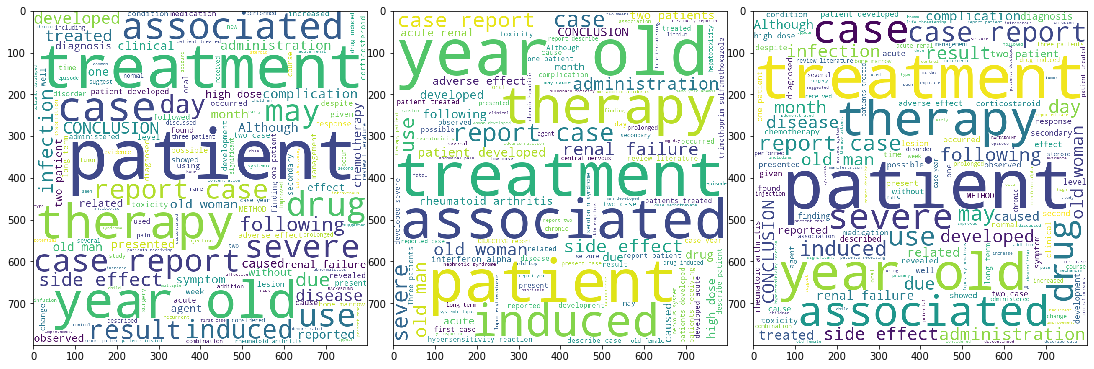

In [10]:
# plot the WordCloud image  
fig, ax = plt.subplots(1,3,figsize = (15, 5)) 
ax[0].imshow(wordcloud, cmap = 'Blues')  
plt.tight_layout(pad = 0)

ax[1].imshow(wordcloud1,cmap = 'afmhot') 
plt.tight_layout(pad = 0)

ax[2].imshow(wordcloud0,cmap = 'Oranges') 
plt.tight_layout(pad = 0)

In [11]:
### 
# 1. identify all the words related to numbers
# 2. identify all irrelevant word list

In [12]:
## ['patient','following','case','woman','old','year','associated','administration','<numbers>','treatment',
# 'man','boy',''number','although', 'day', 'month', 'may', 'administration','patients','METHODS']

In [13]:
# 'out of 5 patients, 1 are having allergy 4 ok' : 0

In [14]:
## removing punctuations and lower case
tweets_df.head()

,ID,tweets,label
0,413205,Intravenous azithromycin-induced ototoxicity.,1
1,528244,"Immobilization, while Paget's bone disease was...",1
2,361834,Unaccountable severe hypercalcemia in a patien...,1
3,292240,METHODS: We report two cases of pseudoporphyri...,1
4,467101,METHODS: We report two cases of pseudoporphyri...,1


In [15]:
# for word in 'Intravenous azithromycin-induced ototoxicity.':
#     print(word)

In [16]:
### punctuations : {;,-!.@?':}

In [17]:
# string.punctuation

In [18]:
## removing punctuation marks
def remove_punctuation(text):
    '''This function should remove punctuation marks.'''
    holder = []  
    for word in text:
        if word not in string.punctuation:
            holder.append(word.lower())
    return "".join(holder)           

In [19]:
tweets_df['tweets_1'] = tweets_df.tweets.apply(remove_punctuation)
tweets_df.loc[:,['tweets','tweets_1']].head()
## .loc syntax: .loc[<range of rows>,<range of columns>] =>.loc[r0:rn,c0:cn] =>.loc[[r0,r1,..,rn],[c0,c1,...,cn]]

,tweets,tweets_1
0,Intravenous azithromycin-induced ototoxicity.,intravenous azithromycininduced ototoxicity
1,"Immobilization, while Paget's bone disease was...",immobilization while pagets bone disease was p...
2,Unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia in a patien...
3,METHODS: We report two cases of pseudoporphyri...,methods we report two cases of pseudoporphyria...
4,METHODS: We report two cases of pseudoporphyri...,methods we report two cases of pseudoporphyria...


In [20]:
## remove stop words
def remove_stopWords(text):
    '''This function will remove stop words.'''
    text_ = [word for word in text.split(' ') if word not in stopword]
    return " ".join(text_)

    # holder = []
    # for word in text.split(' '):
    #     if word not in stopword:
    #         holder.append(word)

    # return " ".join(holder)        

In [21]:
# stopword
tweets_df['tweets_2'] = tweets_df.tweets_1.apply(remove_stopWords)
tweets_df.loc[:,['tweets_1','tweets_2']].head()

,tweets_1,tweets_2
0,intravenous azithromycininduced ototoxicity,intravenous azithromycininduced ototoxicity
1,immobilization while pagets bone disease was p...,immobilization pagets bone disease present per...
2,unaccountable severe hypercalcemia in a patien...,unaccountable severe hypercalcemia patient tre...
3,methods we report two cases of pseudoporphyria...,methods report two cases pseudoporphyria cause...
4,methods we report two cases of pseudoporphyria...,methods report two cases pseudoporphyria cause...


In [22]:
# Lammetization/stemming
nltk.PorterStemmer().stem('severe')

'sever'

In [23]:
# unaccountable severe hypercalcemia in a patient

In [24]:
# nltk.SnowballStemmer('english').stem('unaccountable')

In [25]:
def lammetization(text):
    '''This function will perform lammetization.'''
    text_ = [nltk.PorterStemmer().stem(word) for word in text.split(' ')]
    return " ".join(text_)


In [26]:
#### # Lammetization/stemming
tweets_df['tweets_3'] =  tweets_df.tweets_2.apply(lammetization)
tweets_df.loc[:,['tweets_2','tweets_3']].head()

,tweets_2,tweets_3
0,intravenous azithromycininduced ototoxicity,intraven azithromycininduc ototox
1,immobilization pagets bone disease present per...,immobil paget bone diseas present perhap enhan...
2,unaccountable severe hypercalcemia patient tre...,unaccount sever hypercalcemia patient treat hy...
3,methods report two cases pseudoporphyria cause...,method report two case pseudoporphyria caus na...
4,methods report two cases pseudoporphyria cause...,method report two case pseudoporphyria caus na...


In [27]:
# tranform text data to lower case
# removing stop words
# Lammetization/stemming
# removing punctuations
# tokenisation
# NER indentification
# abbreviation correction
# removing numbers 

In [28]:
def remove_numbers(text):
    '''This function will remove digits from the given text.'''
    return re.sub(pattern= "[0-9]+",repl='', string = text)

In [29]:
tweets_df['tweets_4'] =  tweets_df.tweets_3.apply(remove_numbers)
tweets_df.loc[:,['tweets_3','tweets_4']].head()

,tweets_3,tweets_4
0,intraven azithromycininduc ototox,intraven azithromycininduc ototox
1,immobil paget bone diseas present perhap enhan...,immobil paget bone diseas present perhap enhan...
2,unaccount sever hypercalcemia patient treat hy...,unaccount sever hypercalcemia patient treat hy...
3,method report two case pseudoporphyria caus na...,method report two case pseudoporphyria caus na...
4,method report two case pseudoporphyria caus na...,method report two case pseudoporphyria caus na...


In [30]:
tweets_df.loc[31:32,['tweets_3','tweets_4']].head()

,tweets_3,tweets_4
31,14yearold girl newli diagnos sle develop pruri...,yearold girl newli diagnos sle develop prurit ...
32,hydroxyureainduc acut interstiti pneumon patie...,hydroxyureainduc acut interstiti pneumon patie...


In [31]:
# tweets_df.iloc[:,:].tail()

In [32]:
### 
# 1. identify all the words related to numbers
# 2. identify all irrelevant word list
# 3. do we have direct inbuilt methods in nltk packages to peform above operations?

In [33]:
# tokenisation
# -> what is tokenisation? sentences => words
# -> why do we need to do tokenisation? to perform vectorisation
# 'intraven azithromycininduc ototox' => ['intraven','azithromycininduc','ototox']

In [34]:
def tokenisation(text):
    '''This function will remove digits from the given text.'''
    return re.split(pattern= "\W+",string = text)

In [35]:
tweets_df['tweets_5'] =  tweets_df.tweets_4.apply(tokenisation)
tweets_df.loc[:,['tweets_4','tweets_5']].head()

,tweets_4,tweets_5
0,intraven azithromycininduc ototox,"[intraven, azithromycininduc, ototox]"
1,immobil paget bone diseas present perhap enhan...,"[immobil, paget, bone, diseas, present, perhap..."
2,unaccount sever hypercalcemia patient treat hy...,"[unaccount, sever, hypercalcemia, patient, tre..."
3,method report two case pseudoporphyria caus na...,"[method, report, two, case, pseudoporphyria, c..."
4,method report two case pseudoporphyria caus na...,"[method, report, two, case, pseudoporphyria, c..."
